In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [46]:
csv_dir = Path('../junior_request/myxoma_search/myxoma_z_binding_homolgy_search.csv').resolve()
df = pd.read_csv(csv_dir)

In [32]:
query_dfs['vacv_zna.pdb']['prot_pdb']

0                                                      m27L.pdb
1                                                     m047R.pdb
2                                                     m126R.pdb
3                                                HPXV_dsRBD.pdb
4                                                  MC_dsRBD.pdb
5                                                     m149R.pdb
6                                                     m101L.pdb
7                                                     m049R.pdb
8                                                  MPXV_ZNA.pdb
9                                                     m106L.pdb
10                                                     m66R.pdb
11                                                    m130R.pdb
12                                                    m132L.pdb
13                                         m154L_gp120_like.pdb
14                                                     m50R.pdb
15                                      

In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
display(query_dfs['m029.pdb'][query_dfs['m029.pdb']['TM2'] > 0.4][query_dfs['m029.pdb']['p_val'] > 0].sort_values(by='similarity', ascending=False, inplace=False))

/tmp/ipykernel_2161735/273365409.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(query_dfs['m029.pdb'][query_dfs['m029.pdb']['TM2'] > 0.4][query_dfs['m029.pdb']['p_val'] > 0].sort_values(by='similarity', ascending=False, inplace=False))


,query,prot_pdb,p_val,rmsd,identity,similarity,score,afp,proteome,TM1,TM2,RMSD,ID1,ID2,IDali,L1,L2,Lali,-log_pval
243,m029.pdb,ORF_E3_dsRBD.pdb,9.880000e-15,1.37,0.3068,0.5227,233.84,2667.0,myxoma_proteome,0.6931,0.8839,1.37,0.235,0.307,0.310,115.0,88.0,87.0,14.005243
390,m029.pdb,MYXV_ZNA.pdb,1.490000e-01,2.56,0.0769,0.2692,53.32,949.0,myxoma_proteome,0.1705,0.5724,1.74,0.017,0.074,0.091,115.0,27.0,22.0,0.826814
377,m029.pdb,CTCPXV_ZNA.pdb,1.950000e-02,0.50,0.1250,0.1875,47.44,1150.0,myxoma_proteome,0.1413,0.4430,2.20,0.017,0.061,0.111,115.0,33.0,18.0,1.709965
304,m029.pdb,SFV_ZNA.pdb,1.620000e-01,2.75,0.0400,0.1200,55.03,997.0,myxoma_proteome,0.1664,0.5027,1.99,0.009,0.036,0.045,115.0,28.0,22.0,0.790485
407,m029.pdb,m37L.pdb,1.060000e-01,2.60,0.0385,0.1154,59.78,1130.0,myxoma_proteome,0.1904,0.6225,1.96,0.009,0.031,0.042,115.0,32.0,24.0,0.974694
395,m029.pdb,m104_receptor_like_fragment.pdb,2.300000e-01,4.39,0.0250,0.1125,76.69,2083.0,myxoma_proteome,0.2154,0.4215,3.00,0.035,0.075,0.129,115.0,53.0,31.0,0.638272
305,m029.pdb,m119L.pdb,1.020000e-01,2.08,0.0143,0.0429,68.79,1846.0,myxoma_proteome,0.2260,0.4457,3.01,0.009,0.020,0.030,115.0,50.0,33.0,0.991400


/home/mlsample/.conda/envs/oxdnapy12/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.conda/envs/oxdnapy12/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


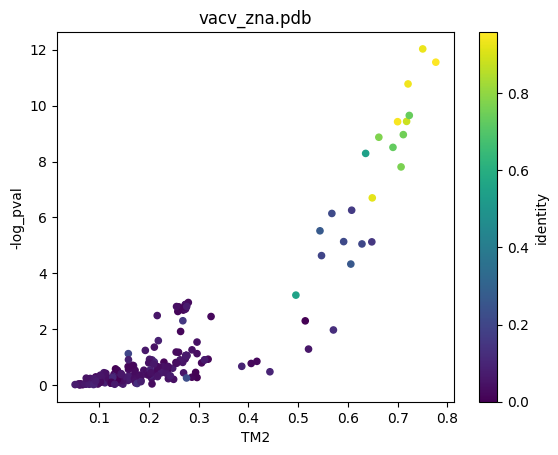

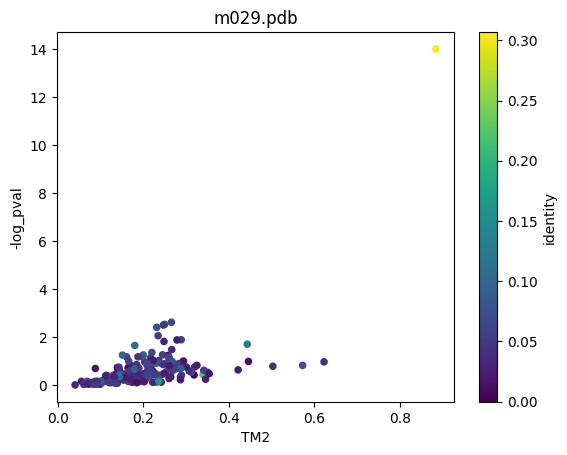

In [57]:
query_names = df['query'].unique()
query_dfs = {elem : pd.DataFrame() for elem in query_names}
for key in query_dfs.keys():
    query_dfs[key] = df[:][df['query'] == key]
    
for key, sub_df in query_dfs.items():
    sub_df['-log_pval'] = -np.log10(sub_df['p_val'])
    sub_df.plot.scatter(y='-log_pval', x='TM2', c='identity')
    # sub_df.plot.scatter(y='-log_pval', x='identity', c='rmsd')
    plt.title(key)